# Report of prediction of projects not fully funded

Dear Donnor org:

In response to your petition to help you decide which schools to include in your pilot training program, we send you this report. We tries to create a model that can help you predict which models have a low probability of being fully funded in 60 days. To did this, we estimated a group a classification models that we will briefly describe. The report includes a brief description of the methodology, followed by the results we achieved and concludes with a recomendation of the next steps to follow.


## Methodology
Using the 124,976 projects you send us, we saw that 29% of them did not achieve complete funding within 60 days of being posted. Using all the information about each project, we built six different classification models that identify the most important characteristics of those projects that were not completelly funded. Each of the model has a different approach, but all have in common that the algorithm, ant not the researcher, identifies the most important variables. In particullar, we fitted the following models: K-nearest neighbors, decision tree, linear regression, support vector machines, random forest and gradient boosting.

We tried to simmulate the decision process you will face when predicting the projects that need the most help. This is, you will have information about the projects the moment they are posted, and you will have to decide if intervene on them based on their probability of being fully funded. For this reason, we divided the two years of information that you gave us in four semesters. Our models were evaluated three times, one for the second semester, using information from the first semester to build the model, one for the third semester, using information from the first and second semester, and one for the fourth semester, using all the previous information.

## Results
To evaluate our models, we compared the projects that we predicted were not going to be fully funded against their real outcome. We built three meassures: Precision, equivalent to the percentage of projects that were in fact not fully funded, out of the total we predicted. Recall: percentage of projects that we correctly predicted that were not going to achieve the objective, out all the projects that did not make it. AUC ROC: Overall meassures that lets us compare how our capable are our models of deciding which projects will fail with a complete random meassure. Of this three meassures, we consider precision to be the most important because you want to maximize out of the 5% of projects that you will help, the number of project that will actually need it. 



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

prediction_grid = pd.read_csv('prediction_grid.csv')

As the following table presents, the best model we estimated was gradient boosting in terms of precision. The average precision of this methodology was 43%, meaning that our of those projects predicted to not achieve the goal in 60 days, 43% actually did not. Followingm support vection machines had a precision of 40%, and in last place K neares neighbors had only 7%.

In terms of recall, the best model was support vector machines, followed by decision tree. In terms of the AUC meassure, the best model was also support vector machines, with an score of 0.67. This score reflects that the models were actually capable of make some classification, but it is not very much greater to the 0.5 AUC that a complete random model would have.


In [21]:
prediction_grid.groupby('model').agg({'precision': np.mean, 'recall': np.mean, 'AUC ROC': np.mean})\
.sort_values('precision', ascending = False)

,precision,recall,AUC ROC
model,,,
gradient_boost,0.436052,0.110059,0.635221
svm,0.408000,0.594496,0.676394
decision_tree,0.345956,0.225257,0.581289
random_forest,0.255225,0.021339,0.669910
logistic_reg,0.156467,0.019157,0.676264
KNN,0.074906,0.006564,0.660581


Making a similar comparison for each of the three validation we did, in terms of precision, gradient boos was the best model for the third and first ones, and support vector machines for the second one.

In [26]:
prediction_grid.groupby(['cross_k', 'model']).agg({'precision': np.mean, 'recall': np.mean, 'AUC ROC': np.mean}).sort_values(['cross_k', 'precision'], ascending = False)

precision    recall   AUC ROC
cross_k model                                        
3       gradient_boost   0.475613  0.127193  0.645968
        svm              0.391052  0.644975  0.683323
        decision_tree    0.354220  0.253588  0.585892
        logistic_reg     0.182632  0.022183  0.681750
        random_forest    0.157301  0.026156  0.680723
        KNN              0.070062  0.011120  0.667010
2       svm              0.495303  0.468512  0.683273
        gradient_boost   0.485019  0.077660  0.641469
        decision_tree    0.382347  0.197815  0.579232
        random_forest    0.332433  0.010447  0.675239
        logistic_reg     0.090645  0.002596  0.684496
        KNN              0.087811  0.001392  0.663391
1       gradient_boost   0.347525  0.125323  0.618226
        svm              0.337645  0.669999  0.662586
        decision_tree    0.301301  0.224369  0.578744
        random_forest    0.275942  0.027414  0.653766
        logistic_reg     0.196123  0.032693  0.662545
        KNN              0.066846  0.007180  0.651340

The models give a score, which in most cases is a probability of having the outcome that one is looking for. To convert that probability into a precition, one must select a threshold. If the threshold is, 0.7, we will predict those observations that have more than 0.7 of score. If we analyze gradient boosting in terms of its precision and the different thresholds, from 0.5 to 0.98, the precision of the model is very simmilar. It only increases from 0.4 to 0.45 from the most relaxed threshold to the tightest.

In [35]:
prediction_grid[prediction_grid['model'] == 'gradient_boost'].groupby('threshold').agg({'precision': np.mean, 'recall': np.mean})\
.sort_values('threshold', ascending = False)

,precision,recall
threshold,,
0.99,0.452861,0.007147
0.98,0.479140,0.016935
0.95,0.449234,0.042009
0.90,0.432242,0.079423
0.80,0.419050,0.139354
0.70,0.414776,0.191906
0.50,0.405063,0.293635


If we analyze svm in terms of its precision, the thresholds with these models are not the probability but the distance to the linear division between those positive and those negatives. Using values from 0 to -1, It is possible to see that precision is maximized when we use the threshold of 0.

In [37]:
prediction_grid[prediction_grid['model'] == 'svm'].groupby('threshold').agg({'precision': np.mean, 'recall': np.mean, 'AUC ROC': np.mean})\
.sort_values('threshold', ascending = False)

,precision,recall,AUC ROC
threshold,,,
0.0,0.535089,0.107247,0.676394
-0.1,0.500414,0.202994,0.676394
-0.3,0.439304,0.467949,0.676394
-0.4,0.411012,0.613174,0.676394
-0.6,0.357875,0.833814,0.676394
-0.8,0.317740,0.946422,0.676394
-1.0,0.294565,0.989868,0.676394


The following is an example of the precision scores of each of the models for each of the thresholds analyzed.

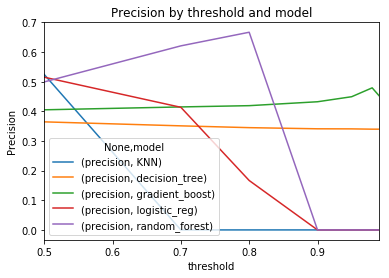

In [38]:
prediction_grid[prediction_grid['model'] != 'svm'].groupby(['threshold', 'model']).agg({'precision': np.mean}).unstack().plot()
plt.title('Precision by threshold and model')
plt.ylabel('Precision')
plt.show()

## Recommendation
We recommend to use the Gradient Boosting model, with a threshold of 0.75 to predict which projects have the highers probability of not achieving the funding goal in 60 days.

